In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [13]:
df = pd.read_csv("Theoph.csv")
df.head()

,Unnamed: 0,Subject,Wt,Dose,Time,conc
0,1,1,79.6,4.02,0.00,0.74
1,2,1,79.6,4.02,0.25,2.84
2,3,1,79.6,4.02,0.57,6.57
3,4,1,79.6,4.02,1.12,10.50
4,5,1,79.6,4.02,2.02,9.66


In [14]:
df.describe()

,Unnamed: 0,Subject,Wt,Dose,Time,conc
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,66.500000,6.500000,69.583333,4.625833,5.894621,4.960455
std,38.249183,3.465203,9.133181,0.718074,6.925952,2.867319
min,1.000000,1.000000,54.600000,3.100000,0.000000,0.000000
25%,33.750000,3.750000,63.575000,4.305000,0.595000,2.877500
50%,66.500000,6.500000,70.500000,4.530000,3.530000,5.275000
75%,99.250000,9.250000,74.425000,5.037500,9.000000,7.140000
max,132.000000,12.000000,86.400000,5.860000,24.650000,11.400000


In [18]:
grouped = df.groupby(df['Subject'])
df_person_1 = grouped.get_group(1).iloc[:, 2:]

,Wt,Dose,Time,conc
0,79.6,4.02,0.00,0.74
1,79.6,4.02,0.25,2.84
2,79.6,4.02,0.57,6.57
3,79.6,4.02,1.12,10.50
4,79.6,4.02,2.02,9.66
5,79.6,4.02,3.82,8.58
6,79.6,4.02,5.10,8.36
7,79.6,4.02,7.03,7.47
8,79.6,4.02,9.05,6.89
9,79.6,4.02,12.12,5.94


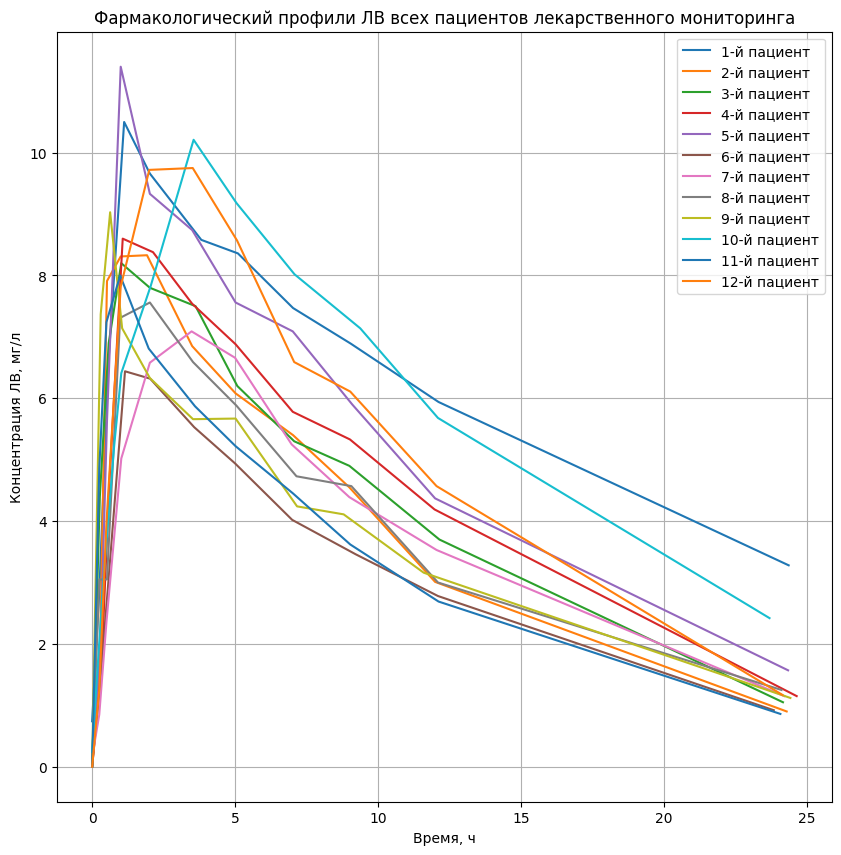

In [21]:
plt.figure(figsize =(10, 10))
for i in set(df["Subject"]):
    df_person = grouped.get_group(i)
    plt.plot(df_person["Time"], df_person[["conc"]], label = f'{i}-й пациент')
plt.xlabel("Время, ч")
plt.ylabel("Концентрация ЛВ, мг/л")
plt.title("Фармакологический профили ЛВ всех пациентов лекарственного мониторинга")
plt.legend()
plt.grid()

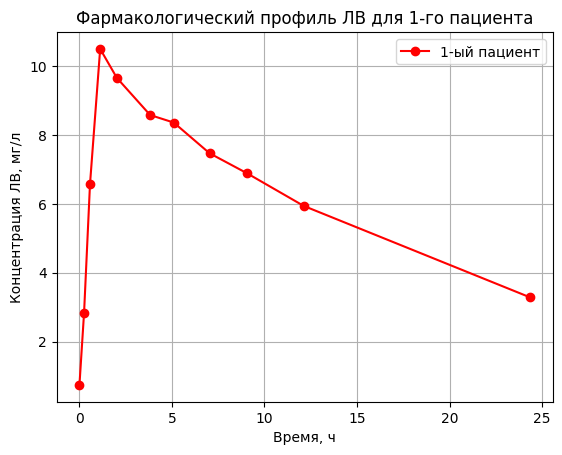

In [20]:
plt.xlabel("Время, ч")
plt.ylabel("Концентрация ЛВ, мг/л")
plt.title("Фармакологический профиль ЛВ для 1-го пациента")
plt.plot(df_person_1['Time'], df_person_1['conc'], 'r-o')
plt.grid()
plt.legend(['1-ый пациент'])

/tmp/ipykernel_17138/2035733993.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxs_df = maxs_df.append(subject.loc[subject['conc'] == subject["conc"].max()])
/tmp/ipykernel_17138/2035733993.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxs_df = maxs_df.append(subject.loc[subject['conc'] == subject["conc"].max()])
/tmp/ipykernel_17138/2035733993.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxs_df = maxs_df.append(subject.loc[subject['conc'] == subject["conc"].max()])
/tmp/ipykernel_17138/2035733993.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxs_df = maxs_df.append(subject.loc[subject['conc'] == subject["con

<Axes: >

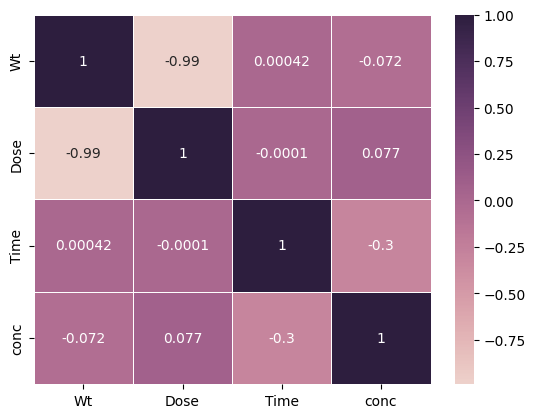

In [82]:
maxs_df = pd.DataFrame()
for i in set(df["Subject"]):
    subject = grouped.get_group(i).iloc[:, 2:]
    maxs_df = maxs_df.append(subject.loc[subject['conc'] == subject["conc"].max()])

corr = df.iloc[:, 2:].corr()
sns.heatmap(corr, annot=True, linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True))

In [74]:
x = np.array(maxs_df["Time"]).reshape(-1, 1)
y = np.array(maxs_df["Dose"])

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(y_test.reshape(-1, 1))

Coef k = [0.53538502]
Coef b = 3.5770797307592845
RSQUARE train: -6.879260991324083
RSQUARE test: 0.520130215985434
RMSE: 0.6456172080098919
MAE: 0.4495211925714167


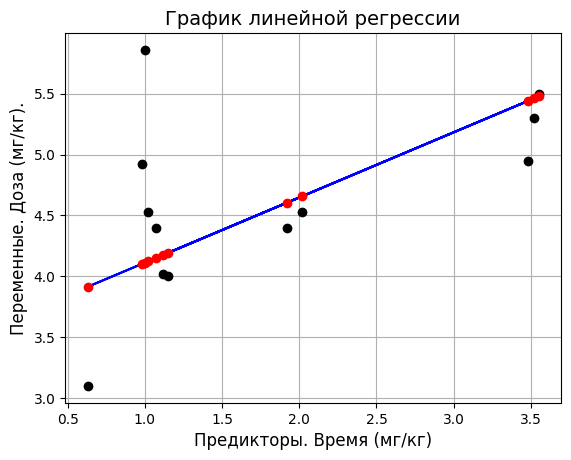

In [76]:
y_pred = model.predict(x)
b0 = model.coef_
b1 = model.intercept_

plt.title('График линейной регрессии', fontsize=14)
plt.xlabel('Предикторы. Время (мг/кг)', fontsize=12)
plt.ylabel('Переменные. Доза (мг/кг).', fontsize=12)
plt.grid()
plt.plot(x, b0 * x + b1, 'b')
plt.plot(maxs_df["Time"], maxs_df["Dose"], 'ko')
plt.plot(x, y_pred, 'ro', label='predict')
print(f'Coef k = {b0}\nCoef b = {b1}')

print("RSQUARE train: {}".format(model.score(X_test, y_test)))
print("RSQUARE test: {}".format(model.score(X_train, y_train)))

from sklearn.metrics import mean_squared_error, mean_absolute_error 
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred))}")
print(f"MAE: {mean_absolute_error(y, y_pred)}")

РЕГУЛЯРИЗАЦИЯ

In [79]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_std, y_std, test_size=0.2, random_state=0)

In [80]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train_scaled)
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)
print(lasso.coef_)

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train_scaled, y_train_pred),
        mean_squared_error(y_test_scaled, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train_scaled, y_train_pred),
        r2_score(y_test_scaled, y_test_pred)))

[0.63655629]
MSE train: 0.381, test: 1.921
R^2 train: 0.499, test: -5.999
